# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```

In [14]:
import pandas as pd
import numpy as np
from collections import Counter
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [16]:
X = data.values[:,0:9 ]
Y = data.values[:, 9]
X_train, X_test, y_train, y_test = train_test_split( X, Y, random_state = 1)

1. a) Implement a decision tree (you can use decision tree implementation from existing libraries).

In [17]:
def traintree(X,y,desctype,max_depth=None, min_samples_leaf=2,min_samples_split = 2, min_impurity_decrease=0, ccp_alpha = 0.0,max_features=None):
  descclf = DecisionTreeClassifier(criterion = desctype,random_state=0, max_depth=max_depth,min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, min_impurity_decrease=min_impurity_decrease, ccp_alpha=ccp_alpha)
  descclf.fit(X, y)
  return descclf

1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [18]:
ginidesc=traintree(X_train, y_train,"gini")
entropydesc=traintree(X_train, y_train,"entropy")

1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [19]:
print("For gini")
gini_y_pred = ginidesc.predict(X_test)
print(classification_report(y_test,gini_y_pred))
entropy_y_pred = entropydesc.predict(X_test)
print("For entropy")
print(classification_report(y_test,entropy_y_pred))


For gini
              precision    recall  f1-score   support

         2.0       0.94      0.99      0.97       118
         4.0       0.98      0.88      0.93        57

    accuracy                           0.95       175
   macro avg       0.96      0.93      0.95       175
weighted avg       0.96      0.95      0.95       175

For entropy
              precision    recall  f1-score   support

         2.0       0.94      0.97      0.96       118
         4.0       0.94      0.88      0.91        57

    accuracy                           0.94       175
   macro avg       0.94      0.93      0.93       175
weighted avg       0.94      0.94      0.94       175



1. d) Experiment with different approaches to decide when to terminate the tree (number of layers, purity measure, etc). Report and give explanations for all approaches. 

# Number of Layers
max_depth, min_samples_split, min_samples_leaf these parameters will determine no of layers of the Decision Tree.

## max_depth


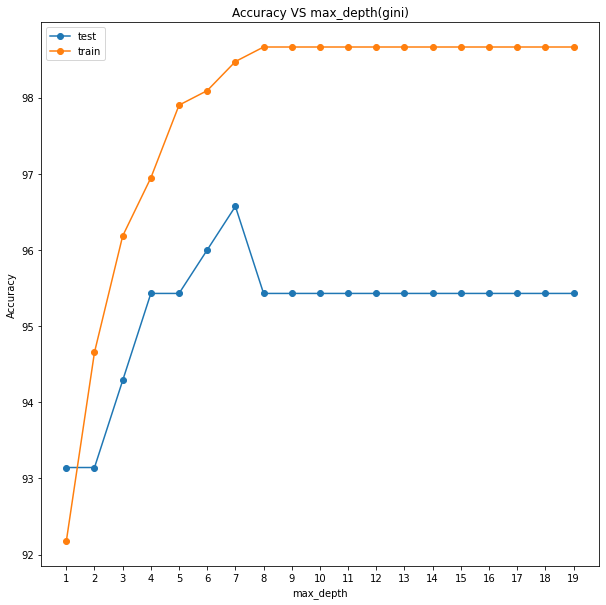

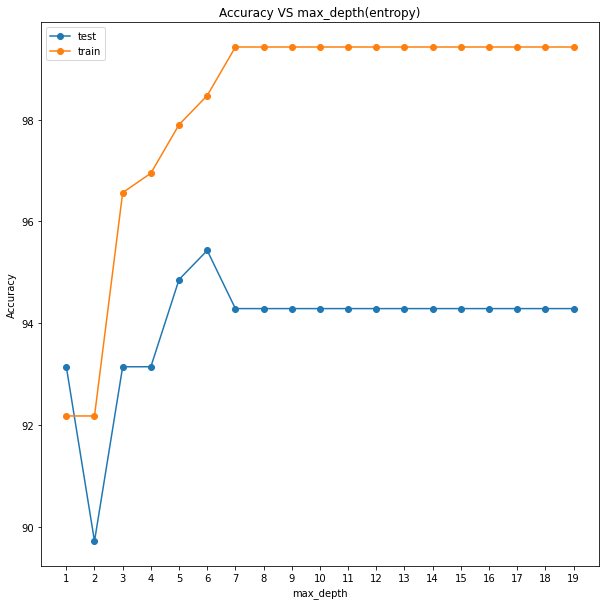

In [57]:
import matplotlib.pyplot as plt
def plotAccuracyGraphMD(desctype):
  accuracies = []
  accuraciestrain=[]
  for i in range(1, 20):
      dt = traintree(X_train, y_train, desctype, max_depth=i)
      accuracy = accuracy_score(y_test, dt.predict(X_test))
      acctrain = accuracy_score(y_train, dt.predict(X_train))
      accuraciestrain.append(acctrain*100)
      accuracies.append(accuracy*100)
  return [*range(1,20)],accuracies,accuraciestrain

fig=plt.figure(figsize=(10,10))
xp,giniacc,ginitrainacc=plotAccuracyGraphMD('gini')
xp,entropyacc,entropytrainacc=plotAccuracyGraphMD('entropy')
plt.title("Accuracy VS max_depth(gini)")
plt.plot(xp,giniacc,label='test',marker='o')
plt.plot(xp,ginitrainacc,label='train',marker='o')
plt.xticks(range(1,20))
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

fig=plt.figure(figsize=(10,10))
plt.title("Accuracy VS max_depth(entropy)")
plt.plot(xp,entropyacc,label='test',marker='o')
plt.plot(xp,entropytrainacc,label='train',marker='o')
plt.xticks(range(1,20))
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Report:**

For gini: 
- max_depth=[1, 2] the accuracy constant, here model undegoes underfit.
- max_depth=[2, 7] the accuracy increases, here model is good fit.
- max_depth=[7,8]  the accuracy decreases, here model undergoes overfit thats why accuracy deacreases.
- max_depth=[8,20] the accuracy constant, because the tree cannot go after this max_depth. i.e all leaf nodes have impurity 0, for this test case.

- for gini max_depth=7 gives the best accuracy, i.e best fit

For entropy: 
- max_depth=[1, 2] the accuracy decreases, here model undegoes underfit.
- max_depth=[2, 6] the accuracy increases, here model is good fit.
- max_depth=[6, 7]  the accuracy decreases, here model undergoes overfit thats why accuracy deacreases.
- max_depth=[7,20] the accuracy constant, because the tree cannot go after this max_depth. i.e all leaf nodes have impurity 0, for this test case.

- for entropy max_depth=6 gives the best accuracy, i.e best fit

**Explanation:**
- max_depth means the maximum depth the tree can go, we know that more the tree grows more the complex it becomes.
- If the depth of the tree becomes more, then tree will overfit to the training data and will result in low accuracries for test data.
- If the depth of the tree becomes less, then tree will underfit to the training data and will result in low accuracries for test data.
- So to control overfitting we will control the dept of the tree i.e max_depth.

## min_samples_split


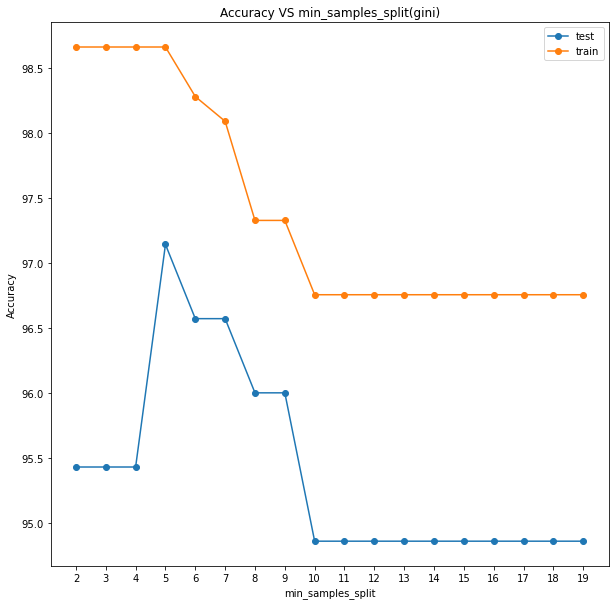

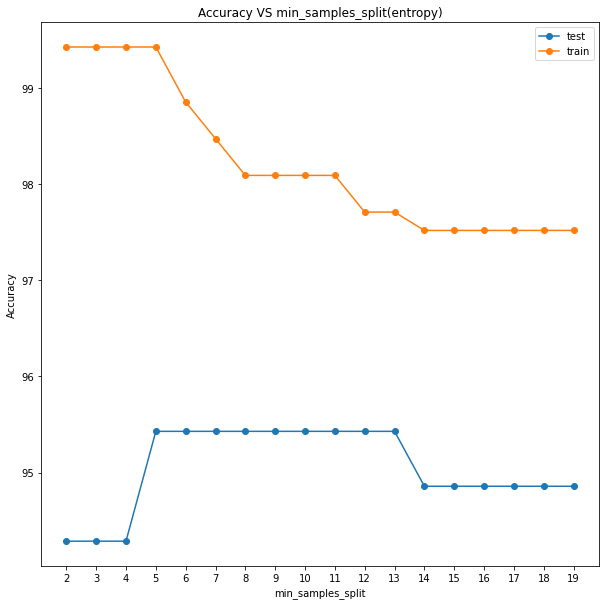

In [58]:
import matplotlib.pyplot as plt
def plotAccuracyGraphMSS(desctype):
  accuracies = []
  accuraciestrain=[]
  for i in range(2, 20):
      dt = traintree(X_train, y_train, desctype, min_samples_split=i)
      accuracy = accuracy_score(y_test, dt.predict(X_test))
      acctrain = accuracy_score(y_train, dt.predict(X_train))
      accuraciestrain.append(acctrain*100)
      accuracies.append(accuracy*100)
  return [*range(2,20)],accuracies,accuraciestrain

fig=plt.figure(figsize=(10,10))
xp,giniacc,ginitrainacc=plotAccuracyGraphMSS('gini')
xp,entropyacc,entropytrainacc=plotAccuracyGraphMSS('entropy')
plt.title("Accuracy VS min_samples_split(gini)")
plt.plot(xp,giniacc,label='test',marker='o')
plt.plot(xp,ginitrainacc,label='train',marker='o')
plt.xticks(range(2,20))
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

fig=plt.figure(figsize=(10,10))
plt.title("Accuracy VS min_samples_split(entropy)")
plt.plot(xp,entropyacc,label='test',marker='o')
plt.plot(xp,entropytrainacc,label='train',marker='o')
plt.xticks(range(2,20))
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Report:**

For gini: 
- min_samples_split =[2,4] the accuracy constant, here model undegoes overfit.
- min_samples_split =[4, 5] the accuracy increases, here model is good fit.
- min_samples_split =[5, 20]  the accuracy decreases, here model undergoes underfit thats why accuracy deacreases.

- for gini min_samples_split =5 gives the best accuracy, i.e best fit

For entropy: 
- min_samples_split =[2, 4] the accuracy decreases, here model undegoes overfit.
- min_samples_split =[4, 5] the accuracy increases, here model is good fit.
- min_samples_split =[5, 13]  the accuracy constant
- min_samples_split =[13, 20]  the accuracy decreases, here model undergoes underfit thats why accuracy deacreases.

- for entropy min_samples_split =5 gives the best accuracy, i.e best fit

**Explanation**
- The minimum number of samples required to split an internal node
- i.e the split on the node will happen only if the no of samples are greater than this value.
- If this value is low then high splitting will happen i.e depth of the tree increases  and causes overfitting
- If this value is high then low splitting will happen i.e depth of the tree decreases and causes underfitting
- In this way this is used to control overfitting

## min_samples_leaf


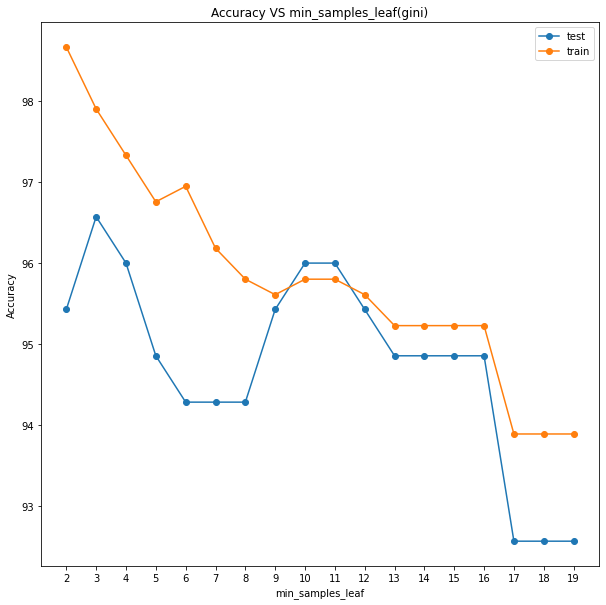

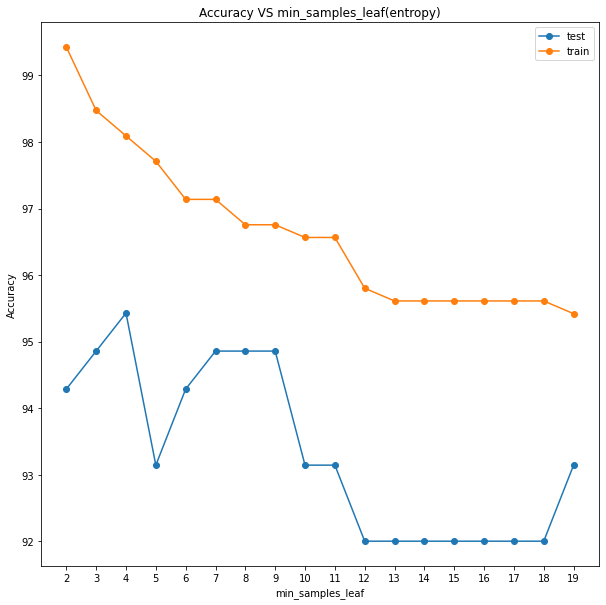

In [60]:
import matplotlib.pyplot as plt
def plotAccuracyGraphMSL(desctype):
  accuracies = []
  accuraciestrain=[]
  for i in range(2, 20):
      dt = traintree(X_train, y_train, desctype, min_samples_leaf=i)
      accuracy = accuracy_score(y_test, dt.predict(X_test))
      acctrain = accuracy_score(y_train, dt.predict(X_train))
      accuraciestrain.append(acctrain*100)
      accuracies.append(accuracy*100)
  return [*range(2,20)],accuracies,accuraciestrain

fig=plt.figure(figsize=(10,10))
xp,giniacc,ginitrainacc=plotAccuracyGraphMSL('gini')
xp,entropyacc,entropytrainacc=plotAccuracyGraphMSL('entropy')
plt.title("Accuracy VS min_samples_leaf(gini)")
plt.plot(xp,giniacc,label='test',marker='o')
plt.plot(xp,ginitrainacc,label='train',marker='o')
plt.xticks(range(2,20))
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

fig=plt.figure(figsize=(10,10))
plt.title("Accuracy VS min_samples_leaf(entropy)")
plt.plot(xp,entropyacc,label='test',marker='o')
plt.plot(xp,entropytrainacc,label='train',marker='o')
plt.xticks(range(2,20))
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Report:**

For gini: 

- for gini min_sample_leaf =3 gives the best accuracy, i.e best fit

For entropy: 

- for entropy min_sample_leaf =4 gives the best accuracy, i.e best fit

**Explanation**
- The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. 

# Purity measure

ccp_alpha parameter will determine purity measure

## ccp_alpha

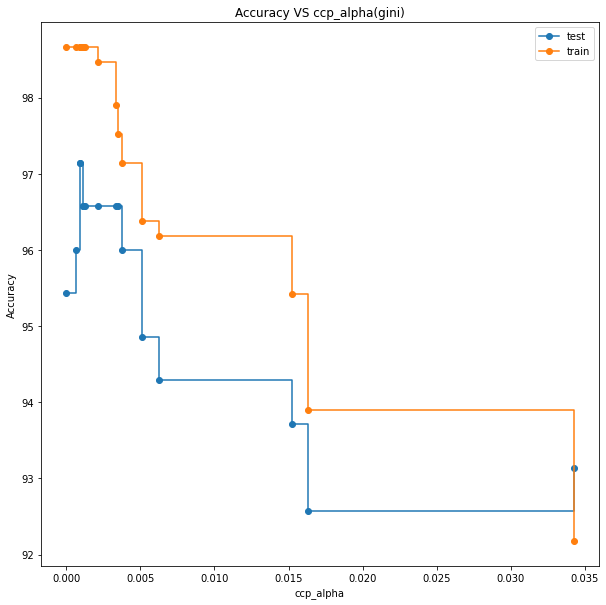

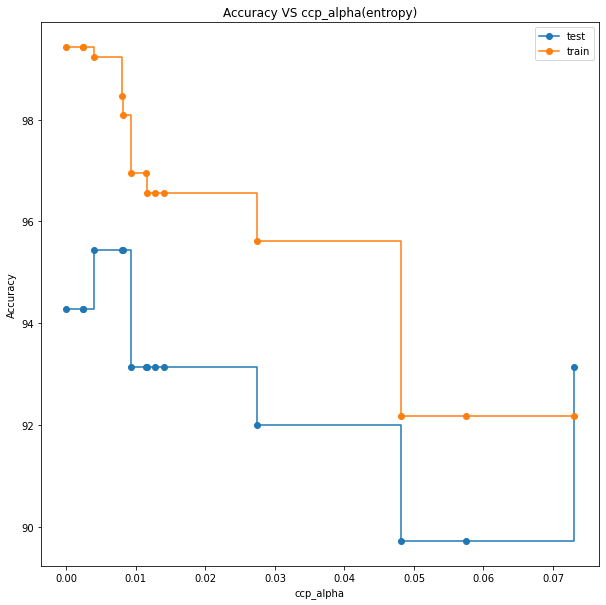

0.0009478792780951466
0.004007376851354723


In [71]:
def plotAccuracyGraphCCP(desctype):
  accuracies = []
  accuraciestrain=[]
  dt=traintree(X_train, y_train, desctype)
  path = dt.cost_complexity_pruning_path(X_train, y_train)
  ccp_alphas = path.ccp_alphas  
  ccp_alphas = ccp_alphas[:-1]
  for i in ccp_alphas:
      dt = traintree(X_train, y_train, desctype,ccp_alpha=i)
      accuracy = accuracy_score(y_test, dt.predict(X_test))
      acctrain = accuracy_score(y_train, dt.predict(X_train))
      accuraciestrain.append(acctrain*100)
      accuracies.append(accuracy*100)
  return ccp_alphas,accuracies,accuraciestrain

fig=plt.figure(figsize=(10,10))
xgp,giniacc,ginitrainacc=plotAccuracyGraphCCP('gini')
xep,entropyacc,entropytrainacc=plotAccuracyGraphCCP('entropy')
plt.title("Accuracy VS ccp_alpha(gini)")
plt.plot(xgp,giniacc,label='test',marker='o',drawstyle="steps-post")
plt.plot(xgp,ginitrainacc,label='train',marker='o',drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

fig=plt.figure(figsize=(10,10))
plt.title("Accuracy VS ccp_alpha(entropy)")
plt.plot(xep,entropyacc,label='test',marker='o',drawstyle="steps-post")
plt.plot(xep,entropytrainacc,label='train',marker='o',drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
print(xgp[3])
print(xep[3])

**Report:**

For gini: 

- for gini ccp_alpha =0.0009478792780951466 gives the best accuracy, i.e best fit

For entropy: 

- for entropy ccp_alpha =0.004007376851354723 gives the best accuracy, i.e best fit

**Explanation**
- Cost complexity pruning (ccp) provides another option to control the tree size. It can be performed by finding the right value for the alpha. Greater values of ccp_alpha increase the number of nodes pruned. By default, the value is zero meaning that no pruning is performed.

2. What is boosting, bagging and  stacking?
Which class does random forests belong to and why?



**Answer:**

- **bagging:**bagging/bootstrap aggregating is an ensemble learning approach used to improve the stability and accuracy of machine learning algorithms. Since multiple model predictions are averaged together to form the final predictions, Bagging reduces variance and helps to avoid overfitting. Bagging is a special case of the model averaging approach, in case of regression problem we take mean of the output and in case of classification we take the majority vote. Bagging is more helpfull if we have over fitting base models.

- **boosting:** machine learning models are used one after the other and the predictions made by first layer models are used as input to next layer models. The last layer of models will use the predictions from all previous layers to get the final predictions. Unlike bagging, in case of boosting the base learners are trained in sequence on a weighted version of the data. Boosting is more helpful if we have biased base models.

- **stacking**:Model stacking is a method for combining models to reduce their biases. The predictions of each individual model are stacked together and used as input to a final estimator to compute the prediction. This final estimator is trained through cross-validation.

- As we know that decision trees will undergo overfit with out pruning.
-In random forests uses bootstrap aggregating to get better results.
- In random forests, we take the majority vote of the predictions of multiple decision trees to get a better model.
So, random forest belongs to the bagging class

3. Implement random forest algorithm using different decision trees . 

In [50]:
class RandomForest():
  def __init__(self, desctype, max_depth, min_samples_split=5, no_of_trees=10):
    self.max_depth=max_depth
    self.no_of_trees=no_of_trees
    self.desctype=desctype
    self.min_samples_split=min_samples_split
    self.features=[]
    self.trees=[]

  def train(self,X,y):
    for i in range(self.no_of_trees):
      inds=np.random.choice(np.arange(X.shape[0]), size=X.shape[0], replace=True)
      indf=np.unique(np.random.choice(np.arange(X.shape[1]), size=X.shape[1], replace=True))
      temp=X[inds]
      temp=temp[:,indf]
      self.trees.append(traintree(temp,y[inds], self.desctype, max_depth=self.max_depth , min_samples_split=self.min_samples_split))
      self.features.append(indf)
  def predict(self, X_test):
    ypredsdt=np.array([self.trees[i].predict(X_test[:,self.features[i]]) for i in range(self.no_of_trees)])
    ytrans=ypredsdt.T
    y_pred=[]
    for i in range(len(ytrans)):
      cn=Counter(ytrans[i])
      y_pred.append(cn.most_common(1)[0][0])
    return y_pred

In [51]:
RF = RandomForest(max_depth=5, min_samples_split=2, no_of_trees=10,desctype='gini')
RF.train(X_train, y_train)
y_pred=RF.predict(X_test)
print(accuracy_score(y_test,entropy_y_pred))

print(classification_report(y_test,entropy_y_pred))

0.9428571428571428
              precision    recall  f1-score   support

         2.0       0.94      0.97      0.96       118
         4.0       0.94      0.88      0.91        57

    accuracy                           0.94       175
   macro avg       0.94      0.93      0.93       175
weighted avg       0.94      0.94      0.94       175



4. Report the accuracies obtained after using the Random forest algorithm and compare it with the best accuracies obtained with the decision trees. 

In [54]:
entropy_RF = RandomForest(max_depth=6, min_samples_split=5, no_of_trees=250,desctype='entropy')
gini_RF = RandomForest(max_depth=6, min_samples_split=5, no_of_trees=250,desctype='gini')

entropy_RF.train(X_train, y_train)
gini_RF.train(X_train, y_train)
entropy_RF_y_pred=entropy_RF.predict(X_test)
gini_RF_y_pred=gini_RF.predict(X_test)
print('for entropy')
print(classification_report(y_test,entropy_RF_y_pred))
print('for gini')
print(classification_report(y_test,gini_RF_y_pred))

print(f"RandomForest entropy accuracy is {accuracy_score(y_test,entropy_RF_y_pred)}")
print(f"Decision tree entropy accuracy is {accuracy_score(y_test,entropy_y_pred)}")
print("We can see that Random forests has more accuracy\n")

print(f"RandomForest gini accuracy is {accuracy_score(y_test,gini_RF_y_pred)}")
print(f"Decision gini accuracy is {accuracy_score(y_test,gini_y_pred)}")
print("We can see that Random forests has more accuracy\n")

for entropy
              precision    recall  f1-score   support

         2.0       0.97      0.99      0.98       118
         4.0       0.98      0.95      0.96        57

    accuracy                           0.98       175
   macro avg       0.98      0.97      0.97       175
weighted avg       0.98      0.98      0.98       175

for gini
              precision    recall  f1-score   support

         2.0       0.97      0.99      0.98       118
         4.0       0.98      0.93      0.95        57

    accuracy                           0.97       175
   macro avg       0.97      0.96      0.97       175
weighted avg       0.97      0.97      0.97       175

RandomForest entropy accuracy is 0.9771428571428571
Decision tree entropy accuracy is 0.9428571428571428
We can see that Random forests has more accuracy

RandomForest gini accuracy is 0.9714285714285714
Decision gini accuracy is 0.9542857142857143
We can see that Random forests has more accuracy



In [55]:
entropy_RF = RandomForest(max_depth=5, min_samples_split=5, no_of_trees=250,desctype='entropy')
gini_RF = RandomForest(max_depth=5, min_samples_split=5, no_of_trees=250,desctype='gini')

entropy_RF.train(X_train, y_train)
gini_RF.train(X_train, y_train)
entropy_RF_y_pred=entropy_RF.predict(X_test)
gini_RF_y_pred=gini_RF.predict(X_test)
print('for entropy')
print(classification_report(y_test,entropy_RF_y_pred))
print('for gini')
print(classification_report(y_test,gini_RF_y_pred))

print(f"RandomForest entropy accuracy is {accuracy_score(y_test,entropy_RF_y_pred)}")
print(f"Decision tree entropy accuracy is {accuracy_score(y_test,entropy_y_pred)}")
print("We can see that Random forests has more accuracy\n")

print(f"RandomForest gini accuracy is {accuracy_score(y_test,gini_RF_y_pred)}")
print(f"Decision gini accuracy is {accuracy_score(y_test,gini_y_pred)}")
print("We can see that Random forests has more accuracy\n")

for entropy
              precision    recall  f1-score   support

         2.0       0.98      0.99      0.99       118
         4.0       0.98      0.96      0.97        57

    accuracy                           0.98       175
   macro avg       0.98      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175

for gini
              precision    recall  f1-score   support

         2.0       0.97      0.99      0.98       118
         4.0       0.98      0.95      0.96        57

    accuracy                           0.98       175
   macro avg       0.98      0.97      0.97       175
weighted avg       0.98      0.98      0.98       175

RandomForest entropy accuracy is 0.9828571428571429
Decision tree entropy accuracy is 0.9428571428571428
We can see that Random forests has more accuracy

RandomForest gini accuracy is 0.9771428571428571
Decision gini accuracy is 0.9542857142857143
We can see that Random forests has more accuracy



The best accuracies for descion tree without controlling overfitting are
> for gini: accuracy=0.9542857142857143

> for entropy: accuracy=0.9428571428571428

The best accuracies for descion tree with controlling overfitting are
> for gini: accuracy ~ 0.969

> for entropy: accuracy ~ 0.954 

And the best accuracries for random forests are
>for gini: accuracy=0.9771428571428571

>for entropy: accuracy=0.9828571428571429

Clearly we can see that random forest performs betters than desicion trees, as decision trees prone to overfit, so accuracies will be lower than random forests.


5. Submit your solution as a separate pdf in the final zip file of your submission


Compute a decision tree with the goal to predict the food review based on its smell, taste and portion size.

(a) Compute the entropy of each rule in the first stage.

(b) Show the final decision tree. Clearly draw it.

Submit a handwritten response. Clearly show all the steps.

| Review | Smell | Taste | Portion Size |
| :---: | :---: | :---: | :---: |
| Negative | Woody | Sweet | Small |
| Negative | Fruity | Salty | Large |
| Negative | Fruity | Salty | Large |
| Positive | Fruity | Sour | Small |
| Positive | Woody | Sour | Small |
| Negative | Woody | Sweet | Large |
| Positive | Woody | Sour | Large |
| Positive | Fruity | Salty | Small |
| Positive | Fruity | Salty | Small |
| Negative | Woody | Sweet | Large |

